# Introduction to Linear Regression



In [12]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries you'll need -- sklearn.linear_model, pandas and matplotlib.pyplot
import matplotlib.pyplot
import pandas
import sklearn.linear_model
import seaborn


In [13]:
# Read in data from chicagohouseprices2.csv. Use column0 as an index
chicago = pandas.read_csv('chicagohouseprices2.csv', header=0, index_col=0 )
chicago

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,NaN,5.38,9,3.22,0,0,0,69.4,196667.5
7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,NaN,4.18,8,3.39,0,0,0,59.5,445030.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0


In [24]:
# Summarise the data with .describe()
chicago.describe()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


In [25]:
# Look for any linear correlations in the data - the bigger the number the better. Ordinary least squares will do
chicago.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


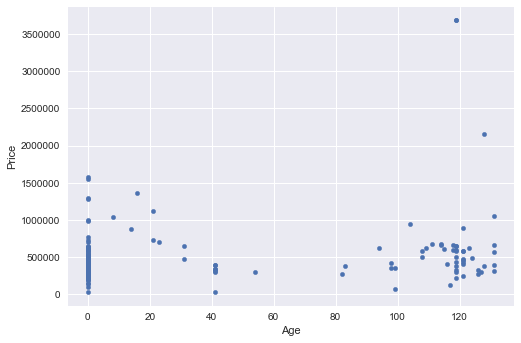

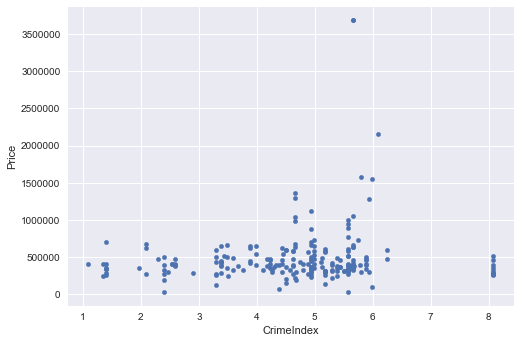

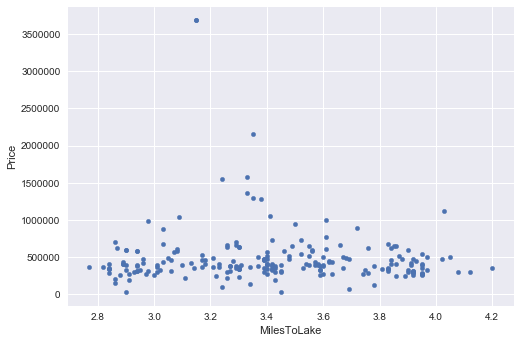

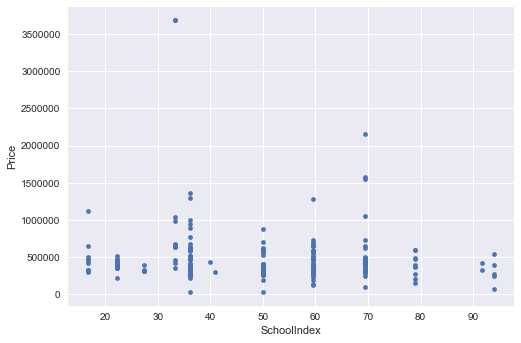

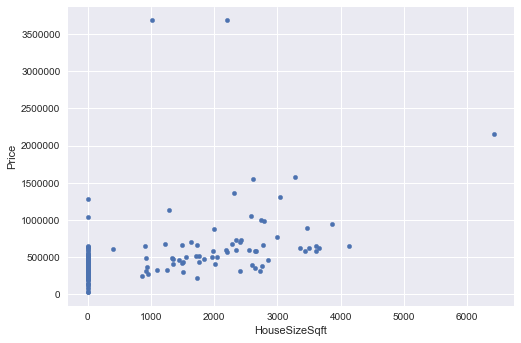

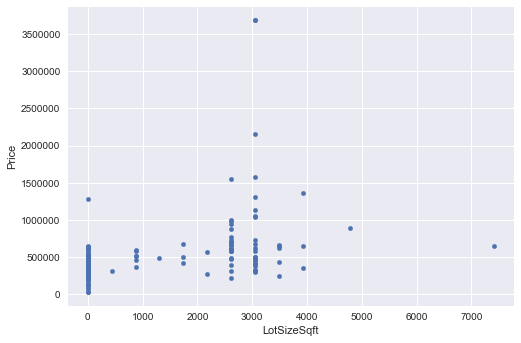

In [35]:
# Make a scatter matrix. You might want to set the size of the figure really large so 
# that you can actually see the content
chicago.plot.scatter('Age', 'Price')
chicago.plot.scatter('CrimeIndex', 'Price')
chicago.plot.scatter('MilesToLake', 'Price')
chicago.plot.scatter('SchoolIndex', 'Price')
chicago.plot.scatter('HouseSizeSqft', 'Price')
chicago.plot.scatter('LotSizeSqft', 'Price')

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [21]:
# create a dataframe with just the estimated price column in it
estimatedPrice = chicago['EstimatedPrice']
estimatedPrice

0       335790.0
1       376908.0
2       629300.0
3       297330.0
4       463644.0
5       813150.0
6       196667.5
7       445030.0
8       538696.0
9       463275.0
10      361782.0
11      334724.0
12      139468.0
13      680550.0
14      516987.0
15      282689.0
16      589410.0
17      644870.0
18      523230.0
19      945180.0
20     1087627.5
21      292320.0
22      449160.0
23      596820.0
24      369342.5
25      288365.0
26      364170.0
27      306950.0
28      357205.0
29      279405.0
         ...    
189     724680.0
190     643344.0
191     236530.0
192     290290.0
193     450800.0
194    1210300.0
195     332087.5
196     331985.0
197     292800.0
198     753720.0
199     635120.0
200     283682.0
201      84798.5
202     329337.0
203     657140.0
204     390104.0
205     282555.0
206     281925.0
207    1463700.0
208     641358.0
209     537573.0
210     552240.0
211     450300.0
212     444792.0
213     317304.0
214     311150.0
215     888160.0
216     241450

In [32]:
# create a RANSAC regressor
ransac = sklearn.linear_model.RANSACRegressor()

In [33]:
# use the RANSAC regressor to find how much of the Price is related to the EstimatedPrice  
X = chicago[[ 'EstimatedPrice' ]]
y = chicago.Price
ransac.fit(X, y)

ransac.estimator_.coef_
ransac.estimator_.intercept_

61636.881729896588

In [39]:
# use that regression to predict Price based on EstimatedPrice
predictions = ransac.predict(X)
predictions

array([  335900.66702596,   369484.68776453,   575631.34281216,
         304487.62559386,   440328.20210813,   725794.8287012 ,
         222269.33950027,   425124.81278891,   501628.55534689,
         440026.81333308,   357130.1983027 ,   335029.98834248,
         175550.40389456,   617490.89490252,   483897.25746728,
         292529.27042986,   543050.31778026,   588348.47893015,
         488996.3634907 ,   833633.20260346,   949980.2961916 ,
         300395.59913585,   428498.08010859,   549102.59643372,
         363305.40110424,   297165.2668721 ,   359080.64923717,
         312344.96981062,   353391.83401162,   289846.99200908,
         367440.30807902,   919247.21723979,   964884.33866514,
         396481.85274051,   318062.37204735,   502656.87097775,
         464043.9865861 ,   504229.15659285,   596418.18380142,
        2010862.65858167,   248292.09578076,   369596.58549402,
         335401.61948787,   531484.8298271 ,   368134.56406491,
         495301.84138607,   479824.01675

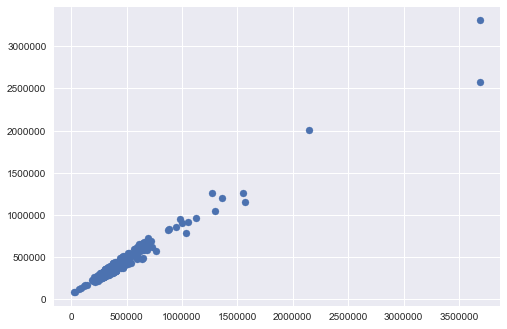

In [41]:
# draw a scatter plot of Price / EstimatedPrice and overlay the RANSAC prediction on it
matplotlib.pyplot.scatter(chicago.Price, predictions)

In [43]:
# RANSAC has an attribute called 'estimator'. What type is it?
ransac.estimator_ 
# type is object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# What is the coefficient (gradient) and y-intercept as reported by this estimator (hint: coef_ and intercept_)
ransac.estimator_.coef_
ransac.estimator_.intercept_

61636.881729896588

In [48]:
# Create a new data frame with two columns: HouseSizeSqft and Bath
houseAndBath = pandas.DataFrame({'HouseSizeSqft': chicago.HouseSizeSqft,'Bath':chicago.Bath.fillna(value=0)})
houseAndBath

,Bath,HouseSizeSqft
0,0.0,0
1,0.0,0
2,4.0,3492
3,0.0,0
4,2.0,1840
5,2.0,1628
6,0.0,0
7,0.0,0
8,2.0,1344
9,2.0,1760


In [49]:
# Regress Price against these values
X = houseAndBath
y = chicago.Price
ransac.fit(X, y)

ransac.estimator_.coef_
ransac.estimator_.intercept_

339290.85456466116

In [60]:
# What would you expect a house price to be for a house with 3 bathrooms and 3500 sqft? 

# HouseSizeSqft
# Bath
newPredictions = ransac.predict([ [3, 3500 ] ])
newPredictions

array([ 630018.95678139])

In [89]:
# Can you find any houses in the data set which are similar to this?
# df.loc[df['column_name'] == some_value]
margin = 20000

# select all the house with a similar Price (between the prediction with a margin on each side)
chicago.loc[(chicago['Price'] - margin < newPredictions[0]) & (chicago['Price'] + margin > newPredictions[0])]

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0
45,"1237 N Wolcott Ave, Chicago IL",Wicker Park,Multi-Family Home,647500,3.0,4.99,9,3.49,119,3920,4125,59.5,530950.0
48,"1750 N Wolcott Ave #204, Chicago IL",Wicker Park,Condo,635000,NaN,4.65,10,3.26,0,0,0,36.1,516255.0
101,"1236 N Hoyne Ave, Chicago IL",Wicker Park,Single-Family Home,650000,1.0,3.39,11,3.85,31,7405,900,69.4,737750.0
167,"1614 W Pierce Ave, Chicago IL",Wicker Park,Multi-Family Home,625000,3.0,4.43,8,2.87,123,2614,3360,50.0,705625.0
175,"1613 N Wolcott Ave, Chicago IL",Wicker Park,Condo,634000,NaN,5.65,9,3.30,0,0,0,33.3,725296.0
176,"1611 N Wolcott Ave, Chicago IL",Wicker Park,Condo,634000,NaN,5.65,9,3.30,0,0,0,33.3,723394.0
190,"1422 N Hoyne Ave #1, Chicago IL",Wicker Park,Multi-Family Home,624000,3.0,3.89,10,3.76,109,3485,3663,69.4,643344.0
208,"1901 W Division St #4S, Chicago IL",Wicker Park,Condo,642000,NaN,3.99,8,3.55,0,0,0,59.5,641358.0


In [93]:
# select all the house with 3 Baths and 3500sqft
sqfitMargin = 50
chicago.loc[(chicago['Bath'] == 3) & (chicago['HouseSizeSqft'] > 3500 - sqfitMargin) & (chicago['HouseSizeSqft'] < 3500 + sqfitMargin)]

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
19,"2152 W Caton St, Chicago IL",Wicker Park,Single-Family Home,885000,3.0,5.58,11,3.72,121,4792,3461,36.1,945180.0


In [ ]:
# Try selecting different variables or combinations of variables or another regressor.




In [ ]:
# (Optional) Can you make a plot to show whether they are effective?